# The Perceptron: A Fundamental Building Block of Neural Networks

## Introduction

The perceptron is the simplest form of a feedforward neural network. Invented by Frank Rosenblatt in 1958, it forms the foundation for modern deep learning. A perceptron is a binary classifier that makes predictions based on a linear combination of input features followed by a step activation function.

## Mathematical Foundation

### The Perceptron Model

The perceptron computes a weighted sum of inputs and applies a step function:

1. **Linear Combination**:
   $z = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$
   where:

   - $w_0$ is the bias term
   - $w_i$ are the weights
   - $x_i$ are the input features

2. **Step Function**:
   $$
   f(z) = \begin{cases}
   1 & \text{if } z > 0 \\
   0 & \text{if } z \leq 0
   \end{cases}
   $$

### Learning Algorithm

The perceptron learns through an iterative process:

1. Initialize weights randomly
2. For each training example:
   - Calculate prediction: $\hat{y} = f(z)$
   - Update weights if prediction is wrong:
     $w_i = w_i + \alpha(y - \hat{y})x_i$
     where $\alpha$ is the learning rate

### Geometric Interpretation

The perceptron learns a hyperplane (a line in 2D) that separates two classes. The equation of this decision boundary is:
$w_0 + w_1x_1 + w_2x_2 = 0$

This line divides the input space into two regions, one for each class.

## Implementation Overview

In this notebook, we will:

1. Generate synthetic binary classification data
2. Implement the perceptron algorithm from scratch
3. Visualize the decision boundary
4. Understand how the perceptron learns to separate classes


In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

# Creating Synthetic Dataset

To demonstrate the perceptron algorithm, we'll create a synthetic binary classification dataset. We use `make_classification` with these parameters:

- `n_samples=100`: Creates 100 data points for training
- `n_features=2`: Each point has 2 features (for 2D visualization)
- `n_classes=2`: Binary classification problem
- `class_sep=10`: High separation between classes for clear visualization
- `random_state=41`: Ensures reproducibility

This will generate linearly separable data, which is necessary since the perceptron can only learn linearly separable patterns.


In [2]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=10,
)

# Data Visualization

Let's visualize our generated dataset to understand its structure:

- Blue and yellow points represent the two different classes
- X-axis and Y-axis represent our two features
- The clear separation between classes shows that the data is linearly separable
- Each point's coordinates correspond to its feature values

This visualization helps us confirm that our data is indeed suitable for the perceptron algorithm, as we can see a clear linear boundary could separate the classes.


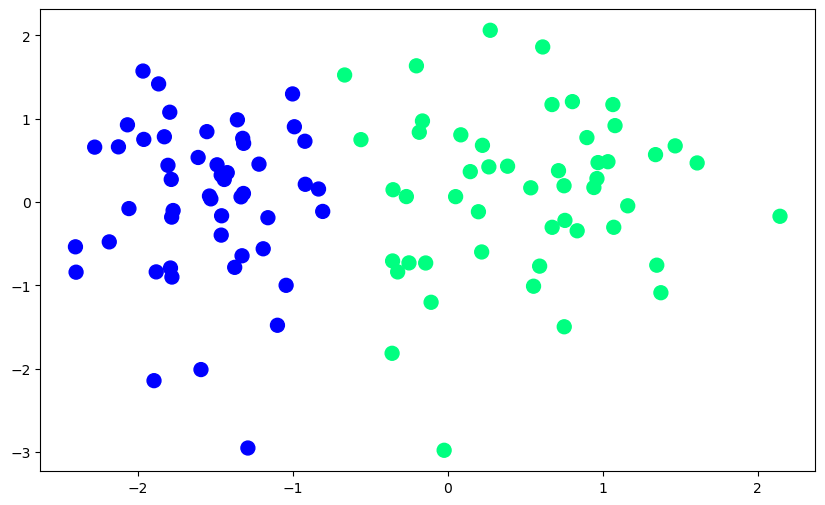

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)

plt.show()

# Step Function: The Activation Function

The step function is the activation function used in the perceptron. It transforms the weighted sum of inputs into a binary output:

$$
f(z) = \begin{cases}
1 & \text{if } z > 0 \\
0 & \text{if } z \leq 0
\end{cases}
$$

Where:

- $z$ is the weighted sum of inputs ($w_0 + w_1x_1 + w_2x_2$)
- Output is binary: 1 for positive class, 0 for negative class

This binary output makes the perceptron suitable for binary classification tasks. Modern neural networks typically use smoother activation functions like ReLU or sigmoid, but the step function was historically the first activation function used.


In [5]:
def step(z):
    return 1 if z > 0 else 0

# Perceptron Learning Algorithm Implementation

The perceptron learning algorithm is an iterative process that adjusts weights to find a separating hyperplane. Here's how it works:

1. **Input Preparation**:

   - Add bias term: $X' = [1, X]$ (adds column of 1s for bias)
   - Initialize weights: $w = [w_0, w_1, w_2]$ (includes bias weight)

2. **Training Loop** (1000 iterations):
   - Randomly select a training example $(x_i, y_i)$
   - Compute prediction: $\hat{y} = f(w^T x_i)$
   - Update weights: $w = w + \alpha(y_i - \hat{y})x_i$

Key Components:

- Learning rate $\alpha = 0.1$: Controls size of weight updates
- Error term $(y_i - \hat{y})$: Difference between true and predicted labels
- Weight update only occurs when prediction is wrong
- Random sample selection helps prevent cycling in non-separable cases

The algorithm continues until maximum iterations are reached or convergence (no misclassifications).


In [8]:
def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        # there are 100 elements in the dataset
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]

    return weights[0], weights[1:]

# Training the Perceptron

Now we'll train our perceptron on the synthetic data. The function returns:

- `intercept_` ($w_0$): The bias term that shifts the decision boundary
- `coef_` ($[w_1, w_2]$): The weights for our two features

These parameters define the decision boundary that separates our two classes. After training, we can use these parameters to make predictions on new data points.


In [11]:
intercept_, coef_ = perceptron(X, y)

print(intercept_, coef_)

0.9 [1.39493787 0.15341686]


# Computing the Decision Boundary

The perceptron's decision boundary is a line that separates the two classes. Its equation is:

$w_1x_1 + w_2x_2 + w_0 = 0$

To visualize this line, we convert it to slope-intercept form $(y = mx + b)$:
$x_2 = -\frac{w_1}{w_2}x_1 - \frac{w_0}{w_2}$

Where:

- Slope $m = -\frac{w_1}{w_2}$
- Y-intercept $b = -\frac{w_0}{w_2}$

Points above this line are classified as one class, points below as the other class.
The weights we learned determine both the slope and position of this boundary.


In [12]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

# Plotting the Decision Boundary

To visualize how well our perceptron has learned to separate the classes:

1. Generate x-coordinates spanning our data range [-3, 3]
2. Calculate corresponding y-coordinates using $y = mx + b$
3. Plot this line along with our data points

The red line represents the decision boundary. Points on one side are classified as class 0, and points on the other side as class 1. A good decision boundary should clearly separate the two classes with minimal misclassifications.


In [14]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

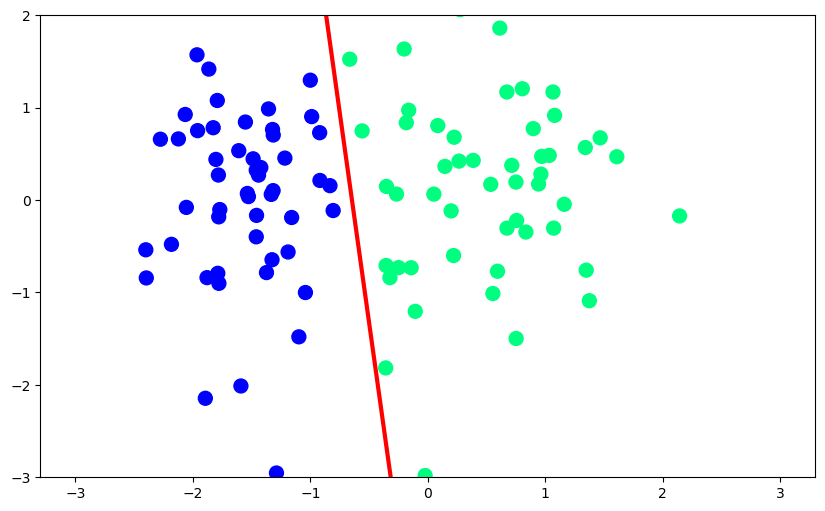

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color="red", linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.ylim(-3, 2)

plt.show()

# Loss Function

## Why We Need a Loss Function in the Perceptron

A loss function is essential for understanding and improving the perceptron's learning process:

1. **Quantifying Performance**: A loss function provides a numerical measure of how poorly our model is performing. It allows us to track whether the model is improving as we train, rather than just observing binary right/wrong predictions.

2. **Guiding Optimization**: The loss function gradient tells us the direction and magnitude to adjust weights. Without a differentiable loss function, we can't use calculus-based optimization techniques like gradient descent to systematically improve the model.

3. **Convergence Criteria**: A loss function gives us a principled way to decide when to stop training. We can monitor if the loss is decreasing and stop when it plateaus, rather than training for an arbitrary fixed number of iterations.

4. **Hyperparameter Tuning**: By comparing loss values across different learning rates, weight initializations, or architectures, we can systematically select the best hyperparameters.

5. **Handling Non-Separable Data**: The step function in the perceptron is non-differentiable, making gradient-based optimization impossible. A smooth loss function (like cross-entropy or hinge loss) can replace the step function to enable learning even when data isn't perfectly linearly separable.

6. **Generalization Assessment**: We can compute loss on a separate validation set to detect overfitting and ensure our model generalizes well to unseen data.

In practice, modern implementations use loss functions like **Cross-Entropy Loss** or **Hinge Loss** instead of the simple step-based error update, allowing for more robust and efficient learning.

## Mathematical Implementation of Perceptron Loss Function

### 1. Perceptron Loss (Hinge Loss variant)

The classical perceptron loss is defined as:

$$L(w) = \sum_{i=1}^{n} \max(0, -y_i(w^T x_i + b))$$

Where:

- $w$ are the weight parameters
- $b$ is the bias term
- $x_i$ is the $i$-th input sample
- $y_i \in \{-1, +1\}$ is the true label (note: perceptron uses -1 and +1, not 0 and 1)
- $n$ is the number of samples

**Interpretation**:

- If prediction is correct: $y_i(w^T x_i + b) > 0$, loss = 0
- If prediction is wrong: $y_i(w^T x_i + b) < 0$, loss = $|y_i(w^T x_i + b)|$

### 2. Simplified Per-Sample Loss

For a single sample, the loss is:

$$L_i = \max(0, -y_i \hat{z}_i)$$

where $\hat{z}_i = w^T x_i + b$ is the model's output (pre-activation).

### 3. Gradient Computation

To optimize the weights using gradient descent, we need the gradient:

$$\frac{\partial L}{\partial w} = -y_i x_i \quad \text{if } y_i(w^T x_i + b) \leq 0$$
$$\frac{\partial L}{\partial w} = 0 \quad \text{if } y_i(w^T x_i + b) > 0$$

$$\frac{\partial L}{\partial b} = -y_i \quad \text{if } y_i(w^T x_i + b) \leq 0$$
$$\frac{\partial L}{\partial b} = 0 \quad \text{if } y_i(w^T x_i + b) > 0$$

### 4. Weight Update Rule

Using gradient descent with learning rate $\alpha$:

$$w_{t+1} = w_t - \alpha \frac{\partial L}{\partial w}$$
$$b_{t+1} = b_t - \alpha \frac{\partial L}{\partial b}$$

When misclassified:
$$w_{t+1} = w_t + \alpha \cdot y_i \cdot x_i$$
$$b_{t+1} = b_t + \alpha \cdot y_i$$

This is exactly what we implemented in our perceptron function! The update only occurs when a sample is misclassified ($y_i(w^T x_i + b) \leq 0$).

### 5. Total Training Loss

For an entire dataset, we often report the average loss:

$$L_{avg} = \frac{1}{n} \sum_{i=1}^{n} \max(0, -y_i(w^T x_i + b))$$

This metric allows us to monitor overall model performance across epochs and determine when to stop training.


In [ ]:
def perceptron(X, y):
    w1 = w2 = b = 1
    lr = 0.1
    epochs = 1000

    # technically this is gd
    for _ in range(epochs):
        for i in range(X.shape[0]):
            # check condition
            z = w1 * X[i][0] + w2 * X[i][1] + b
            if z * y[i] < 0:
                # only update if it is misclassified
                # these are derivatives, we are updating them using partial derivatives
                # see the above mathematical equations
                w1 = w1 + lr * y[i] * X[i][0]
                w2 = w2 + lr * y[i] * X[i][1]
                b = b + lr * y[i]

    return w1, w2, b

In [21]:
w1, w2, b = perceptron(X, y)

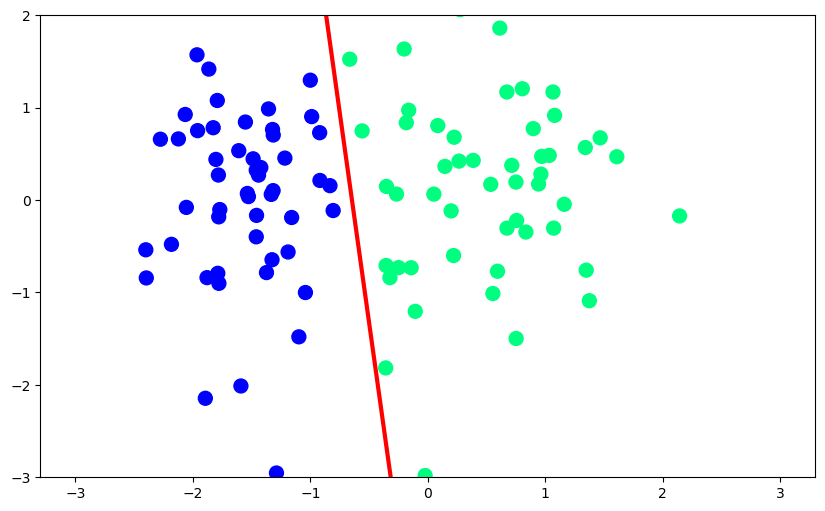

In [23]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color="red", linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.ylim(-3, 2)

plt.show()

# The Perceptron as a Foundation for Other Regression and Classification Methods

The perceptron is not just an isolated algorithm—it forms the foundation for more sophisticated regression and classification techniques. By replacing or modifying its step function, we can derive logistic regression, softmax regression, and even linear regression. Understanding these connections reveals the deep relationships between different machine learning algorithms.

## 1. Perceptron to Logistic Regression

### Key Difference: Activation Function

The fundamental difference between the perceptron and logistic regression lies in the **activation function**:

- **Perceptron**: Uses the step function (non-differentiable, produces hard binary outputs)
  $$f(z) = \begin{cases} 1 & \text{if } z > 0 \\ 0 & \text{if } z \leq 0 \end{cases}$$

- **Logistic Regression**: Uses the sigmoid function (smooth, differentiable, produces probabilities)
  $$\sigma(z) = \frac{1}{1 + e^{-z}}$$

### Model Architecture

Both follow the same linear model structure:

1. Compute weighted sum: $z = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$
2. Apply activation function: $\hat{y} = f(z)$

The weighted sum is **identical**—only the activation differs.

### Loss Function Difference

- **Perceptron**: Uses hinge loss (only updates on misclassifications)
  $$L = \max(0, -y_i(w^T x_i + b))$$

- **Logistic Regression**: Uses binary cross-entropy loss (updates based on probability error)
  $$L = -[y_i \log(\sigma(z_i)) + (1-y_i)\log(1-\sigma(z_i))]$$

### Why This Change Matters

The sigmoid function:

- Produces **probability outputs** between 0 and 1 (not hard 0/1 decisions)
- Is **differentiable** everywhere, enabling gradient-based optimization
- Provides **smoother learning** for non-linearly separable data
- Gives **probabilistic interpretations** for predictions

### Mathematical Derivation

Starting from the perceptron update rule:
$$w = w + \alpha(y - \hat{y})x$$

When we replace the step function with sigmoid:

- $\hat{y} = \sigma(w^T x)$
- The gradient becomes: $\frac{\partial L}{\partial w} = -(y - \sigma(z))x$
- Weight update: $w = w + \alpha(y - \sigma(z))x$

This is the **gradient descent update for logistic regression**.

### Geometric Interpretation

While the perceptron finds **any** separating hyperplane, logistic regression finds the hyperplane that **maximizes the margin** probabilistically. It's more robust when data is not perfectly linearly separable.

## 2. Perceptron to Softmax Regression (Multi-class Classification)

### Extending from Binary to Multi-class

The perceptron naturally handles binary classification. Softmax regression extends this to $K$ classes:

### Key Differences

- **Perceptron**: Binary classification with step function
  $$\hat{y} \in \{0, 1\}$$

- **Softmax Regression**: Multi-class classification with softmax function
  $$P(\text{class } k) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}$$

### Model Architecture for Softmax

1. **Compute Linear Combinations** (one per class):
   $$z_k = w_{k,0} + w_{k,1}x_1 + w_{k,2}x_2 + ... + w_{k,n}x_n$$
   for $k = 1, 2, ..., K$

2. **Apply Softmax Function**:
   $$P(y = k | x) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}$$

This transforms the $K$ linear scores into a **probability distribution** over classes.

### Loss Function: Categorical Cross-Entropy

$$L = -\sum_{k=1}^{K} y_k \log(P(y = k | x))$$

where $y_k$ is 1 if the true class is $k$, and 0 otherwise (one-hot encoding).

### Weight Update Rule

Using gradient descent with learning rate $\alpha$:

$$w_k = w_k + \alpha(y_k - P(y = k | x))x$$

for each class $k$.

### Key Advantages Over Binary Perceptron

- Handles **any number of classes** naturally
- Produces **valid probability distributions** (all probabilities sum to 1)
- Each prediction is a **confidence score** for each class
- Generalizes easily to deep neural networks (softmax is the standard output layer)

### Mathematical Connection to Perceptron

The perceptron with step function for binary classification:

- Computes: $z = w^T x$
- Makes decision: $\hat{y} = \text{step}(z)$

Softmax with K=2 classes reduces to logistic regression (proof omitted for brevity), which is the smooth generalization of the binary perceptron.

## 3. Perceptron to Linear Regression

### The Surprising Connection

Linear regression can be viewed as a perceptron **without a nonlinear activation function**:

### Model Comparison

- **Perceptron**: $\hat{y} = \text{step}(w^T x + b)$ → Binary classification
- **Linear Regression**: $\hat{y} = w^T x + b$ → Continuous prediction

### Removing the Activation Function

Linear regression is essentially:
$$\hat{y} = z = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$

It's the **perceptron without the step function**—the raw linear combination directly becomes the prediction.

### Loss Function

Instead of classification loss, linear regression uses **Mean Squared Error (MSE)**:

$$L = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

### Weight Update (Gradient Descent)

The gradient with respect to weights:
$$\frac{\partial L}{\partial w} = -\frac{2}{n}(y_i - \hat{y}_i)x_i$$

Weight update:
$$w = w + \alpha(y_i - \hat{y}_i)x_i$$

**Notice**: This update rule has the same form as the perceptron's update rule! The key difference is that the error $(y_i - \hat{y}_i)$ is continuous, not binary.

### Geometric Interpretation

- **Perceptron**: Finds a hyperplane that **separates** two classes
- **Linear Regression**: Finds a hyperplane that **minimizes distance** to all data points

### Why No Activation Function?

For regression, we want:

- **Continuous outputs** (not bounded to [0,1] or {0,1})
- The linear combination to directly represent the target variable
- Outputs can be any real number

### The Unified Framework

```
Input → [Linear Combination: z = w^T x + b] → [Activation Function]
                          |
            ┌─────────────┼─────────────┐
            |             |             |
        No Function   Sigmoid       Step Function
            |             |             |
        Linear Reg   Logistic Reg   Perceptron
       (Continuous) (Probability)  (Classification)
```

## 4. The Universal Linear Model

All these algorithms share a common structure:

### General Framework

1. **Feature Transformation**: $z = w_0 + w^T x$
2. **Activation Function**: $f(z)$ (identity, sigmoid, step, softmax)
3. **Loss Function**: Chosen based on the task
4. **Optimization**: Gradient descent (or stochastic gradient descent)

### Summary Table

| Algorithm           | Activation | Output                   | Loss Function             | Task                       |
| ------------------- | ---------- | ------------------------ | ------------------------- | -------------------------- |
| Linear Regression   | Identity   | Continuous               | MSE                       | Regression                 |
| Perceptron          | Step       | {0, 1}                   | Hinge                     | Binary Classification      |
| Logistic Regression | Sigmoid    | [0, 1]                   | Binary Cross-Entropy      | Binary Classification      |
| Softmax Regression  | Softmax    | Probability Distribution | Categorical Cross-Entropy | Multi-class Classification |

### Key Insights

1. **Same Foundation**: All algorithms start with a linear combination of inputs
2. **Activation Changes Everything**: The choice of activation function determines the output type and task
3. **Loss Function Drives Learning**: Different loss functions optimize for different objectives
4. **Unified Optimization**: All use variants of gradient descent for learning
5. **Scalability**: These principles extend to deep neural networks with multiple layers

### Practical Implications

- Understanding the perceptron gives insight into why **logistic regression works better** for binary classification (smoother, probabilistic)
- The progression explains why **softmax is the standard output layer** for multi-class neural networks
- It clarifies why **linear regression** is the simplest predictive model and why adding nonlinear activations creates more powerful classifiers
- This foundation is essential for understanding **modern deep learning**, which combines multiple nonlinear layers

The perceptron is thus the seed from which all supervised learning algorithms grow—by changing activation functions and loss functions, we can cultivate logistic regression, softmax regression, linear regression, and ultimately, the deep neural networks that power modern AI.
